In [1]:
# pip install ipympl
%matplotlib widget

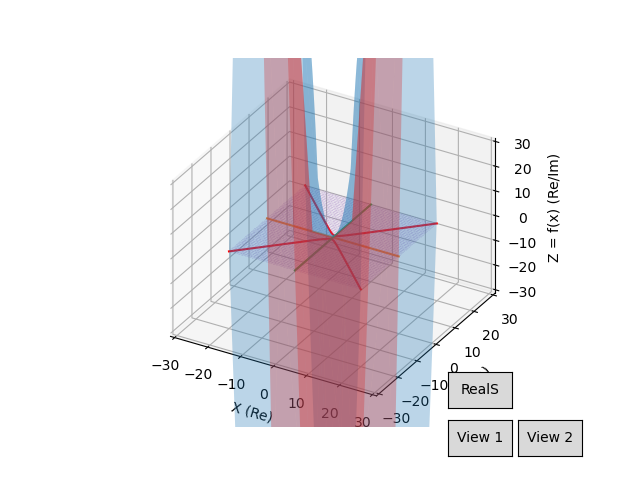

In [12]:
# Import packages
import numpy as np
from mpl_toolkits.mplot3d import Axes3D   # Needed to create 3D plots
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import math   
from matplotlib.widgets import Button

# Define function
def fun(x):
    # Note: x is a complex() object, and * and + are defined for complex numbers
    return x*x + 1

def surface_1_curve(x):
    return np.sqrt(x*x + 1)

def surface_2_curve(x):
    return -1.0 * np.sqrt(x*x + 1)

# Create 1x1 figure with 3 axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_proj_type('ortho')

# Define grid of x and w using a step of 0.05
x = w = np.arange(-20.0, 20.0, 0.05)
X, W = np.meshgrid(x,w)
complexVals = X + 1j*W      # Convert X/W grid into complex numbers

# Call the function on the complex numbers and extract the real/imag parts
Y_Z = fun(complexVals)
Y = Y_Z.real
Z = Y_Z.imag

# Create colormap for W
color_dimension = W
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)


# Create surface real
surface_real= ax.plot_surface(X, W, Y, shade=False,
                linewidth=0, antialiased=True, alpha = 0.3, rstride=200, cstride=200)

ax.plot(x, surface_1_curve(x), np.zeros_like(x), color = 'r')
ax.plot(x, surface_2_curve(x), np.zeros_like(x), color = 'r')

ax.plot(x, np.zeros_like(x), np.zeros_like(x))

ax.plot(np.zeros_like(x), x, np.zeros_like(x))

# Create surface img
surface_img= ax.plot_surface(X, W, Z, shade=False, linewidth=0, antialiased=True, alpha = 0.3,rstride=200, cstride=200)

# draw X-Y plane
ax.plot_surface(X, W, np.zeros_like(X), shade=False,
                linewidth=0, antialiased=False, alpha = 0.1)


ax.set_xlabel('X (Re)')
ax.set_ylabel('X (Im)')
ax.set_zlabel('Z = f(x) (Re/Im)')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)
# ax.view_init(45, 45)
# ax.dist = 5

class ViewController:
    azim = -60
    elev = 30

    def set_view_1(self, event):
        self.azim = 0
        self.elev = 30
        ax.azim = self.azim
        ax.elev = self.elev
        ax.dist = 3
        plt.draw()
        # self.show_status()


    def set_view_2(self, event):
        self.azim = 90
        self.elev = 45
        ax.azim = self.azim
        ax.elev = self.elev
        ax.dist = 3
        plt.draw()
        # self.show_status()
    
    def toggleVisSurfaceReal(self, event):
        if surface_real.get_visible():
            surface_real.set_visible(False)
        else:
            surface_real.set_visible(True)

    
    def show_status(self):
        print('ax.azim = {}'.format(ax.azim))
        print('ax.dist = {}'.format(ax.dist))
        print('ax.elev = {}'.format(ax.elev))
callback = ViewController()
btn_ax = fig.add_axes([0.7, 0.05, 0.1, 0.075])
btn = Button(btn_ax, "View 1")
btn.on_clicked(callback.set_view_1)

btn_ax_2 = fig.add_axes([0.81, 0.05, 0.1, 0.075])
btn_2 = Button(btn_ax_2, "View 2")
btn_2.on_clicked(callback.set_view_2)

btn_ax_3 = fig.add_axes([0.7, 0.15, 0.1, 0.075])
btn_3 = Button(btn_ax_3, "RealS")
btn_3.on_clicked(callback.toggleVisSurfaceReal)

# Show plot with colorbar
plt.show()